In [20]:
## Loading pandas 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [21]:
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:200].to_dict())
                
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

In [22]:
## Noe importing the data 
import pandas as pd
data = pd.read_csv('googleplaystore.csv')

In [23]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [24]:
desc_df = describe_more(data)

In [25]:
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,App,9660,object,1,194,"{'ROBLOX': 9, 'CBS Sports App - Scores, News, ..."
1,Category,34,object,3,19,"{'FAMILY': 1972, 'GAME': 1144, 'TOOLS': 843, '..."
2,Rating,40,float64,3,4,"{4.4: 1109, 4.3: 1076, 4.5: 1038, 4.2: 952, 4...."
3,Reviews,6002,object,1,8,"{'0': 596, '1': 272, '2': 214, '3': 175, '4': ..."
4,Size,462,object,3,18,"{'Varies with device': 1695, '11M': 198, '12M'..."
5,Installs,22,object,1,14,"{'1,000,000+': 1579, '10,000,000+': 1252, '100..."
6,Type,3,object,1,4,"{'Free': 10039, 'Paid': 800, '0': 1}"
7,Price,93,object,1,8,"{'0': 10040, '$0.99': 148, '$2.99': 129, '$1.9..."
8,Content Rating,6,object,3,15,"{'Everyone': 8714, 'Teen': 1208, 'Mature 17+':..."
9,Genres,120,object,4,37,"{'Tools': 842, 'Entertainment': 623, 'Educatio..."


In [26]:
columns_to_remove = ['Last Updated', 'Current Ver', 'Android Ver']
data = data.drop(columns=columns_to_remove)

In [27]:
data[data['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"


In [28]:
data.dropna(subset = ['Content Rating'], inplace=True)

In [29]:
## Now checking any missing values 
#Solution
missing_values = data.isnull().sum()
missing_values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
dtype: int64

In [30]:
## Now replacing all the missing values with 0 and Missing 
def replace_missing_values(data):
    for col in data.columns:
        if data[col].dtype == 'float64' or data[col].dtype == 'int64':
            data[col].fillna(0, inplace=True)
        else:
            data[col].fillna("Missing", inplace=True)
    return data

data = replace_missing_values(data)
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [31]:
## Now removing any duplicate values in the dataset 
## Checking duplicate values 
data.duplicated().sum()

485

In [32]:
## Removing duplicate values 
data.drop_duplicates(inplace=True)

In [33]:
data.duplicated().sum()

0

In [34]:
## Now checking all the unique values in dataset 
data.nunique()

App               9659
Category            33
Rating              40
Reviews           6001
Size               461
Installs            21
Type                 3
Price               92
Content Rating       6
Genres             119
dtype: int64

In [35]:
desc_df = describe_more(data)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,App,9659,object,1,194,"{'ROBLOX': 9, '8 Ball Pool': 7, 'Zombie Catche..."
1,Category,33,object,4,19,"{'FAMILY': 1943, 'GAME': 1121, 'TOOLS': 842, '..."
2,Rating,40,float64,3,3,"{0.0: 1465, 4.4: 1032, 4.3: 1016, 4.5: 977, 4...."
3,Reviews,6001,object,1,8,"{'0': 593, '1': 272, '2': 213, '3': 170, '4': ..."
4,Size,461,object,3,18,"{'Varies with device': 1526, '11M': 188, '13M'..."
5,Installs,21,object,1,14,"{'1,000,000+': 1488, '10,000,000+': 1130, '100..."
6,Type,3,object,4,7,"{'Free': 9589, 'Paid': 765, 'Missing': 1}"
7,Price,92,object,1,7,"{'0': 9590, '$0.99': 146, '$2.99': 125, '$1.99..."
8,Content Rating,6,object,4,15,"{'Everyone': 8380, 'Teen': 1146, 'Mature 17+':..."
9,Genres,119,object,4,37,"{'Tools': 841, 'Entertainment': 588, 'Educatio..."


In [36]:
def printinfo():
    temp = pd.DataFrame(index=data.columns)
    temp['data_type'] = data.dtypes
    temp['null_count'] = data.isnull().sum()
    temp['unique_count'] = data.nunique()
    return temp

In [127]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,0,41
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,0,4
Price,object,0,93
Content Rating,object,0,7
Genres,object,0,120


In [37]:
## Converting SIZE into integers 
import pandas as pd
import numpy as np

# Function to convert size string to integer
def convert_size(size):
    if size == 'Varies with device':
        return np.nan
    
    size = size.replace('k', '').replace('M', '000')
    try:
        converted_size = int(size)
        return converted_size
    except ValueError:
        return np.nan

# Convert the "Size" column values to integers
data['Size'] = data['Size'].apply(convert_size)

# Print the updated DataFrame
print(data)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews     S

In [38]:
data['Size'].unique()

array([1.90e+04, 1.40e+04,      nan, 2.50e+04, 2.90e+04, 3.30e+04,
       2.80e+04, 1.20e+04, 2.00e+04, 2.10e+04, 3.70e+04, 1.70e+04,
       3.90e+04, 3.10e+04, 2.30e+04, 1.10e+04, 2.40e+04, 1.50e+04,
       1.00e+04, 2.60e+04, 5.60e+04, 5.70e+04, 3.50e+04, 5.40e+04,
       2.01e+02, 2.70e+04, 1.60e+04, 3.80e+04, 3.20e+04, 1.80e+04,
       5.20e+04, 3.00e+04, 2.20e+04, 1.30e+04, 7.30e+04, 4.20e+04,
       5.50e+04, 2.30e+01, 5.10e+04, 4.10e+04, 4.80e+04, 4.60e+04,
       4.00e+04, 6.10e+04, 6.60e+04, 7.90e+01, 1.18e+02, 4.40e+04,
       6.95e+02, 1.80e+01, 5.30e+04, 4.50e+04, 6.30e+04, 4.90e+04,
       7.70e+04, 7.00e+04, 3.60e+04, 8.40e+04, 9.70e+04, 4.70e+04,
       5.56e+02, 5.26e+02, 7.60e+04, 5.90e+04, 7.80e+04, 7.20e+04,
       4.30e+04, 3.34e+02, 3.40e+04, 9.30e+04, 6.50e+04, 7.90e+04,
       1.00e+05, 5.80e+04, 5.00e+04, 6.80e+04, 6.40e+04, 6.70e+04,
       6.00e+04, 9.40e+04, 2.32e+02, 9.90e+04, 6.24e+02, 9.50e+04,
       4.10e+01, 2.92e+02, 1.10e+01, 8.00e+04, 7.40e+04, 6.20e

In [39]:
print(data.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
dtype: object


In [40]:
## Now converting reviews 
data['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [42]:
data['Reviews'] = data['Reviews'].astype('int')
print(f"Dtype of ['Reviews'] column is now : {data['Reviews'].dtypes}")

Dtype of ['Reviews'] column is now : int32


In [43]:
print(data.dtypes)

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
dtype: object


In [44]:
## Now converting INSTALLS to int/float 
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [46]:
data['Installs'].value_counts()

1,000,000+        1488
10,000,000+       1130
100,000+          1129
10,000+           1033
1,000+             890
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Name: Installs, dtype: int64

In [47]:
desc_df = describe_more(data)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,App,9659,object,1,194,"{'ROBLOX': 9, '8 Ball Pool': 7, 'Zombie Catche..."
1,Category,33,object,4,19,"{'FAMILY': 1943, 'GAME': 1121, 'TOOLS': 842, '..."
2,Rating,40,float64,3,3,"{0.0: 1465, 4.4: 1032, 4.3: 1016, 4.5: 977, 4...."
3,Reviews,6001,int32,1,8,"{0: 593, 1: 272, 2: 213, 3: 170, 4: 137, 5: 10..."
4,Size,368,float64,3,8,"{11000.0: 188, 13000.0: 186, 12000.0: 186, 140..."
5,Installs,21,object,1,14,"{'1,000,000+': 1488, '10,000,000+': 1130, '100..."
6,Type,3,object,4,7,"{'Free': 9589, 'Paid': 765, 'Missing': 1}"
7,Price,92,object,1,7,"{'0': 9590, '$0.99': 146, '$2.99': 125, '$1.99..."
8,Content Rating,6,object,4,15,"{'Everyone': 8380, 'Teen': 1146, 'Mature 17+':..."
9,Genres,119,object,4,37,"{'Tools': 841, 'Entertainment': 588, 'Educatio..."


In [54]:
## Now remoeving "," "+" from the install columns to make them into int 
data['Installs'] = data['Installs'].str.replace(',', '').str.replace('+', '')

AttributeError: Can only use .str accessor with string values!

In [53]:
data['Installs'] = data['Installs'].replace('Free', 0)

In [55]:
data['Installs'] = data['Installs'].astype(int)

In [56]:
print(data.dtypes)

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
dtype: object


In [58]:
data['Installs'].value_counts()

1000000       1488
10000000      1130
100000        1129
10000         1033
1000           890
100            710
5000000        683
500000         517
50000          474
5000           469
10             385
100000000      369
500            328
50000000       272
50             204
5               82
1               67
500000000       61
1000000000      49
0               15
Name: Installs, dtype: int64

In [59]:
## Now converting price into int/float 
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [60]:
# Remove commas and plus signs from the 'Price' column
data['Price'] = data['Price'].str.replace('.', '').str.replace('$', '')

In [63]:
data['Price'] = data['Price'].replace('Everyone', 0)

In [66]:
data['Price'] = data['Price'].astype(float)

In [67]:
data['Price'].unique()

array([    0.,   499.,   399.,   699.,   149.,   299.,   799.,   599.,
         349.,   199.,   999.,   749.,    99.,   900.,   549.,  1000.,
        2499.,  1199.,  7999.,  1699.,  1499.,   100.,  2999.,  1299.,
         249.,  1099.,   150.,  1999.,  1599.,  3399.,  7499.,  3999.,
         395.,   449.,   170.,   899.,   200.,   388.,  2599., 39999.,
        1799., 40000.,   302.,   176.,   484.,   477.,   161.,   250.,
         159.,   649.,   129.,   500.,  1399., 29999., 37999.,  3799.,
        1899., 38999.,  1990.,   849.,   175.,  1400.,   485.,  4699.,
       10999., 15499.,   308.,   259.,   480.,   196.,  1940.,   390.,
         459.,  1546.,   304.,   429.,   260.,   328.,   460.,  2899.,
         295.,   290.,   197., 20000.,  8999.,   256.,  3099.,   361.,
       39499.,   126.,   120.,   104.])

In [68]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,40
Reviews,int32,0,6001
Size,float64,5073,368
Installs,int32,0,20
Type,object,0,3
Price,float64,0,92
Content Rating,object,0,6
Genres,object,0,119


In [71]:
## Dropping the missing values columns in size 
data.dropna(subset = ['Size'], inplace=True)

In [72]:
printinfo()

,data_type,null_count,unique_count
App,object,0,4943
Category,object,0,33
Rating,float64,0,40
Reviews,int32,0,3445
Size,float64,0,368
Installs,int32,0,20
Type,object,0,2
Price,float64,0,51
Content Rating,object,0,5
Genres,object,0,111


In [73]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,50000,Free,0.0,Everyone,Art & Design
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,1000000,Free,0.0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...,...,...
10828,Manga-FR - Anime Vostfr,COMICS,3.4,291,13000.0,10000,Free,0.0,Everyone,Comics
10832,FR Tides,WEATHER,3.8,1195,582.0,100000,Free,0.0,Everyone,Weather
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.0,1000,Free,0.0,Everyone,Books & Reference
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education


# Data Visualisation 

Q1) Which are the top 10 apps having the highest rating in the given available dataset?

In [74]:
# Sort the DataFrame by 'Rating' column in descending order
sorted_data= data.sort_values('Rating', ascending=False)

# Select the top 10 apps with the highest rating
top_10_apps = sorted_data.head(10)

# Display the top 10 apps
print(top_10_apps[['App', 'Rating']])

                                  App  Rating
10357                      Ríos de Fe     5.0
6823   Barisal University App-BU Face     5.0
6372            BK Formula Calculator     5.0
10335                   Safe Santa Fe     5.0
10326       Comunidad De Fe Minitries     5.0
2522           420 BZ Budeze Delivery     5.0
9498   EK Bailey Preaching Conference     5.0
6807                        Jabbla BT     5.0
7756                          iReadMe     5.0
6398                      BK Gold App     5.0


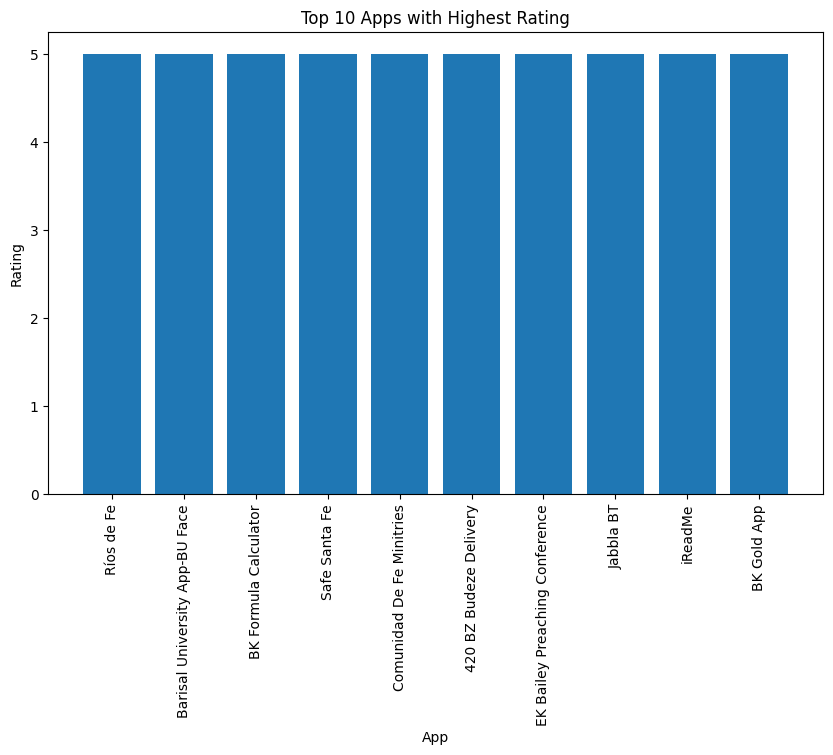

In [75]:
## Generating the graph for the same 
import matplotlib.pyplot as plt
# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_apps['App'], top_10_apps['Rating'])
plt.xlabel('App')
plt.ylabel('Rating')
plt.title('Top 10 Apps with Highest Rating')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the graph
plt.show()

Q2) What is the number of installs and reviews for the top 5 most reviewed apps?

In [78]:
## Sorting the data by descending order to get top 5 apps 
sort_reviews = data.sort_values('Reviews', ascending=False)
## Top 5 apps 
top5apps = sort_reviews.head(5)
## Now getting thr total number of installs for top 5 reviewed apps 
installs = top5apps['Installs']
reviews = top5apps['Reviews']

In [81]:
print(installs)
print(reviews)

1879     100000000
1670     100000000
3986     100000000
1872    1000000000
1750    1000000000
Name: Installs, dtype: int32
1879    44893888
1670    44891723
3986    44881447
1872    27725352
1750    27724094
Name: Reviews, dtype: int32


In [83]:
## Visualisation for the same 
for app, num_installs, num_reviews in zip(top5apps['App'], installs, reviews):
    print(f"App: {app}")
    print(f"Number of Installs: {num_installs}")
    print(f"Number of Reviews: {num_reviews}")
    print("---------------------------")

App: Clash of Clans
Number of Installs: 100000000
Number of Reviews: 44893888
---------------------------
App: Clash of Clans
Number of Installs: 100000000
Number of Reviews: 44891723
---------------------------
App: Clash of Clans
Number of Installs: 100000000
Number of Reviews: 44881447
---------------------------
App: Subway Surfers
Number of Installs: 1000000000
Number of Reviews: 27725352
---------------------------
App: Subway Surfers
Number of Installs: 1000000000
Number of Reviews: 27724094
---------------------------


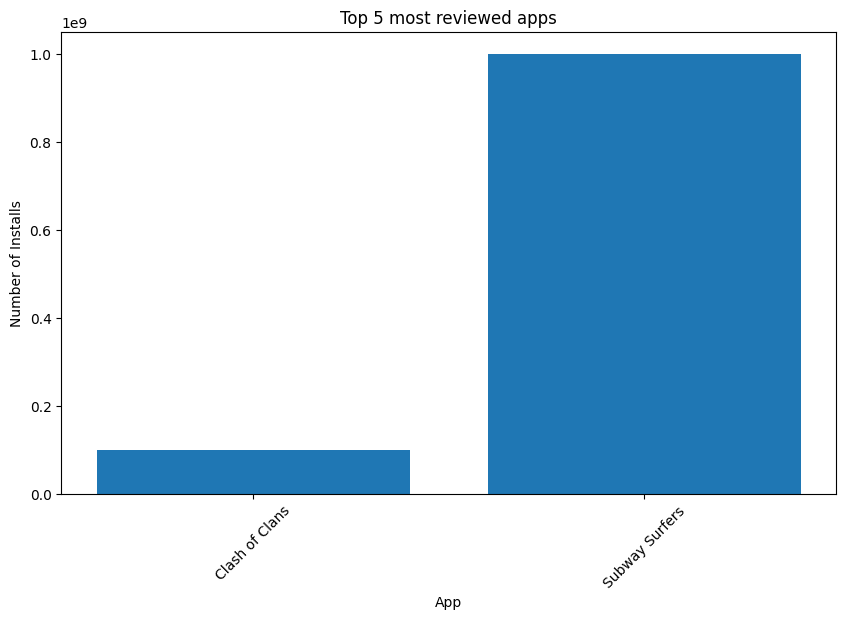

In [86]:
## Generating the graph for the same 
import matplotlib.pyplot as plt
# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top5apps['App'], top5apps['Installs'])
plt.xlabel('App')
plt.ylabel('Number of Installs')
plt.title('Top 5 most reviewed apps')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the graph
plt.show()

Q3) Which app has the highest number of reviews? Also, mention the number of reviews and category of the app.

In [88]:
## Sorting the data by descending order to get top 5 apps 
sort_highestno = data.sort_values('Reviews', ascending=False)
## Highest number of reviews 
highestno = sort_highestno.iloc[0]

In [91]:
appname = highestno['App']
noreviews = highestno['Reviews']
appcategory = highestno['Category']

## Printing values 
print("App with highest reviews:")
print(f"App name : {appname}")
print(f"Number of reviews : {noreviews}")
print(f"App Category : {appcategory}")


App with highest reviews:
App name : Clash of Clans
Number of reviews : 44893888
App Category : GAME


Q4) What is the total amount of revenue generated by the google play store by hosting apps? (Whenever a user buys apps  from the google play store, the amount is considered in the revenue).

In [92]:
## Getting the total revenue generated from google play store 
totalrevenue = data['Price'].sum()
print(f"Total Revenue: {totalrevenue}")

Total Revenue: 406578.0


Q5) Which category of google play store apps has the highest number of installs? Also, find out the total number of installs for that particular category.

In [96]:
## Sorting the data by descending order to get top 5 apps 
sort_category = data.sort_values('Category', ascending=False)
## Now grouping installs and category to get the number 
categoryinstalls = sort_category.groupby('Category')['Installs'].sum()
## Highest number of installs 
highestinsatllscategory = categoryinstalls.idxmax()
totalhighestinsatllscategory = categoryinstalls.max()

print ("Category with highest number of insatlls:")
print(f"Category: {highestinsatllscategory}")
print(f"Total Number of insatlls: {totalhighestinsatllscategory}")

Category with highest number of insatlls:
Category: GAME
Total Number of insatlls: 26481850273


Q6) Which genre has the most number of published apps?

In [99]:
## The genre with most number of apps published 
genrecounts = data['Genres'].value_counts()
mostpublished = genrecounts.idxmax()
noappspublished = genrecounts.max()

print("Genre with most number of published apps:")
print(f"Most Published Apps:{mostpublished}")
print(f"Number of Published Apps:{noappspublished}")

Genre with most number of published apps:
Most Published Apps:Action
Number of Published Apps:307
